# Cell Types Project
*Replace this with the name of your project*

## Team Member Names & Contributions
Group 3
- **Chloe Nguyen (A16794414)**: Responsible for data wrangling, data visualization
- **Amber Selstad (A16898643)**: 

## Abstract

*Fill in your 3-4 sentence abstract here*

## Research Question

How do the electrophysiological profiles of human neurons differ by whether they are spiny or aspiny, and how do their respective gene expression differences contribute to their overall morphology and function?

# Background and Prior Work

*Fill in your background and prior work here (~500 words). You are welcome to use additional subheadings. You should also include a paragraph describing each dataset and how you'll be using them.* 

- describe the function and shape and differences between spiny and aspiny neurons from past research
- reference how tau, vrest, ri, upstroke/downstroke ratio, and ___ may differ in spiny versus aspiny
- research different genes involved in the morphology of spines versus no spines for gene expression analysis, such as if they are excitatory or inhibitory

### References (include links):
(1) 

(2)

## Hypothesis


*Fill in your hypotheses here*

## Setup

In [1]:
## This code imports packages essential for downstream data wrangling, analysis, manipulation, etc. Figures are plotted within the Jupyter notebook
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

## Data Wrangling

Describe your data wrangling steps here.

Both datasets of interest for our project come from the Allen Brain Institute, specifically the Allen Cell Types website (https://celltypes.brain-map.org/data) and the Allen RNA-seq website (https://celltypes.brain-map.org/data). The Cell Types website provides an extensive database of electrophysiological and morphogical features of both human and mouse cells, which we will utilize to filter for the samples needed to answer our research question.

The Allen Software Development Kit (AllenSDK) is a core package that facilitates reading and processing Allen Brain Institute data like the Cell Types one. First, once AllenSDK is installed, the 'CellTypesCache' module can extract and access the Cell Types database within a Python environment, while the 'CellTypesApi' module then enables us to query the database. After initalizing the cache to ctc, we can then begin filtering this data.

In [2]:
# Importing the Allen Cell Types database into Python
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

# Creating a dataframe with only human cells
human_cells = ctc.get_cells(species=[CellTypesApi.HUMAN])
human_df = pd.DataFrame(human_cells)

# Setting the index to the specimen id instead of arbitrary index values
human_df = human_df.set_index('id') 
human_df.head(5) # Showcasing the first 5 rows of this dataframe

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
id,,,,,,,,,,,,,,,
525011903,None,"[273.0, 354.0, 216.0]",Homo Sapiens,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,None,epilepsy,524848408,right,NaN
528642047,None,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,None,epilepsy,528574320,left,NaN
537256313,None,"[322.0, 255.0, 92.0]",Homo Sapiens,H16.03.006.01.05.02,4,12141,MTG,,spiny,truncated,None,epilepsy,536912860,right,NaN
519832676,None,"[79.0, 273.0, 91.0]",Homo Sapiens,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,full,epilepsy,518641172,left,0.290951
596020931,None,"[66.0, 220.0, 105.0]",Homo Sapiens,H17.06.009.11.04.02,4,12141,MTG,,aspiny,NA,full,tumor,595954915,left,0.497825


For the scope of our project, we are interested in comparing spiny and aspiny neurons across all provided brain regions in the Cell Types Database instead a select few lobes or regions. This research method can provide a broader generalized overview of spiny versus aspiny neuron function within the human cerebral cortex.

In [3]:
# Creating separate datasets for spiny versus aspiny neurons within all brain regions
human_spiny = human_df[human_df['dendrite_type'] == 'spiny']
human_aspiny = human_df[human_df['dendrite_type'] == 'aspiny']

In [4]:
# Checking the dataframe to ensure it has the correct rows
human_spiny.head(5) 

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
id,,,,,,,,,,,,,,,
525011903,None,"[273.0, 354.0, 216.0]",Homo Sapiens,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,None,epilepsy,524848408,right,NaN
537256313,None,"[322.0, 255.0, 92.0]",Homo Sapiens,H16.03.006.01.05.02,4,12141,MTG,,spiny,truncated,None,epilepsy,536912860,right,NaN
519832676,None,"[79.0, 273.0, 91.0]",Homo Sapiens,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,full,epilepsy,518641172,left,0.290951
569095789,None,"[110.0, 122.0, 240.0]",Homo Sapiens,H17.06.004.11.05.04,2,12136,AnG,,spiny,intact,full,tumor,569008241,left,0.056400
545608578,None,"[312.0, 280.0, 89.0]",Homo Sapiens,H16.03.010.13.06.01,3,12141,MTG,,spiny,intact,None,epilepsy,545510854,right,NaN


In [23]:
# Checking the dataframe to ensure it has the correct rows
human_aspiny.head(5)
human_aspiny.columns

Index(['reporter_status', 'cell_soma_location', 'species', 'name',
       'structure_layer_name', 'structure_area_id', 'structure_area_abbrev',
       'transgenic_line', 'dendrite_type', 'apical', 'reconstruction_type',
       'disease_state', 'donor_id', 'structure_hemisphere',
       'normalized_depth'],
      dtype='object')

After creating separate dataframes for our spiny versus aspiny cell data, we then need to import their corresponding electrophysiological data. This enables us to compare and contrast their behaviors given their different morphological features, especially as spiny and aspiny neurons are known to perform different functions and responses to inputs/stimuli. This can be done with the get_ephys_features function provided by the AllenSDK package.

In [6]:
ephys_features = ctc.get_ephys_features()
ephys_features = pd.DataFrame(ephys_features)
ephys_features = ephys_features.set_index('specimen_id') # Setting the index by specimen_id, similar to how the previous dataframes were set to 'id' 
print(ephys_features.columns)

Index(['adaptation', 'avg_isi', 'electrode_0_pa', 'f_i_curve_slope',
       'fast_trough_t_long_square', 'fast_trough_t_ramp',
       'fast_trough_t_short_square', 'fast_trough_v_long_square',
       'fast_trough_v_ramp', 'fast_trough_v_short_square', 'has_burst',
       'has_delay', 'has_pause', 'id', 'input_resistance_mohm', 'latency',
       'peak_t_long_square', 'peak_t_ramp', 'peak_t_short_square',
       'peak_v_long_square', 'peak_v_ramp', 'peak_v_short_square',
       'rheobase_sweep_id', 'rheobase_sweep_number', 'ri', 'sag', 'seal_gohm',
       'slow_trough_t_long_square', 'slow_trough_t_ramp',
       'slow_trough_t_short_square', 'slow_trough_v_long_square',
       'slow_trough_v_ramp', 'slow_trough_v_short_square', 'tau',
       'threshold_i_long_square', 'threshold_i_ramp',
       'threshold_i_short_square', 'threshold_t_long_square',
       'threshold_t_ramp', 'threshold_t_short_square',
       'threshold_v_long_square', 'threshold_v_ramp',
       'threshold_v_short_square

We then have to merge together our spiny and aspiny dataframes with their respective ephys data, doing so with the pandas 'join' with the default 'inner' function that will only merge entrices that appear in both dataframes.

In [7]:
human_spiny_ephys = human_spiny.join(ephys_features, how='inner')
human_aspiny_ephys = human_aspiny.join(ephys_features, how='inner')

In [17]:
human_spiny_ephys.head(5) # Checking the dataframe to ensure the merge was successful

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
525011903,None,"[273.0, 354.0, 216.0]",Homo Sapiens,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,...,4.134987,1.375253,-53.968754,-59.510420,-71.197919,2.895461,2.559876,3.099787,-88.843758,-70.561035
537256313,None,"[322.0, 255.0, 92.0]",Homo Sapiens,H16.03.006.01.05.02,4,12141,MTG,,spiny,truncated,...,5.694547,1.389900,-52.125004,-51.520836,-72.900002,3.121182,3.464528,3.054681,-87.531250,-72.628105
519832676,None,"[79.0, 273.0, 91.0]",Homo Sapiens,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,...,9.962780,1.211020,-53.875004,-52.416668,-73.693753,4.574865,3.817988,4.980603,-84.218758,-72.547661
569095789,None,"[110.0, 122.0, 240.0]",Homo Sapiens,H17.06.004.11.05.04,2,12136,AnG,,spiny,intact,...,5.483953,1.225900,-51.406254,-59.552087,-81.875008,2.199872,2.220031,2.235442,-95.843758,-81.065971
545608578,None,"[312.0, 280.0, 89.0]",Homo Sapiens,H16.03.010.13.06.01,3,12141,MTG,,spiny,intact,...,22.069340,1.112633,-54.343754,-54.968751,-75.156258,3.675430,3.665890,3.586321,-78.500000,-74.496262


In [18]:
human_aspiny_ephys.head(5) # Checking the dataframe to ensure the merge was successful

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
528642047,None,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,...,NaN,1.051160,-67.468758,NaN,-70.875002,1.891881,NaN,1.989616,-101.000000,-69.209610
596020931,None,"[66.0, 220.0, 105.0]",Homo Sapiens,H17.06.009.11.04.02,4,12141,MTG,,aspiny,NA,...,14.667340,1.336668,-63.593754,-63.239583,-75.518753,1.452890,1.441754,1.556087,-82.531250,-74.260269
576095991,None,"[274.0, 331.0, 228.0]",Homo Sapiens,H17.06.007.11.08.01,5,12116,MFG,,aspiny,NA,...,3.245000,1.053000,-59.156254,-61.437502,-67.625004,2.520616,2.586455,2.219604,-81.406250,-64.442192
531520637,None,"[127.0, 354.0, 219.0]",Homo Sapiens,H16.06.007.01.05.03,3,12113,FroL,,aspiny,NA,...,13.983713,1.427020,-62.125000,-62.718751,-77.043750,1.315267,1.307436,1.375686,-85.250008,-76.195251
596049209,None,"[66.0, 220.0, 105.0]",Homo Sapiens,H17.06.009.11.04.05,1,12141,MTG,,aspiny,NA,...,1.969320,1.048904,-59.093750,-56.583336,-62.612502,3.138165,3.238456,2.890686,-99.718758,-60.669804


We can now begin to compare the two different neuron types by their electrophysiological data. Instead of comparing every single variable, we are choosing to compare a few key properties that reflect general basic neuron electrophysiology: resting membrane potential (vrest), input resistance (ri), membrane time constant (tau), upstroke/downstroke ratio (upstroke_downstroke_ratio_long_square), and 

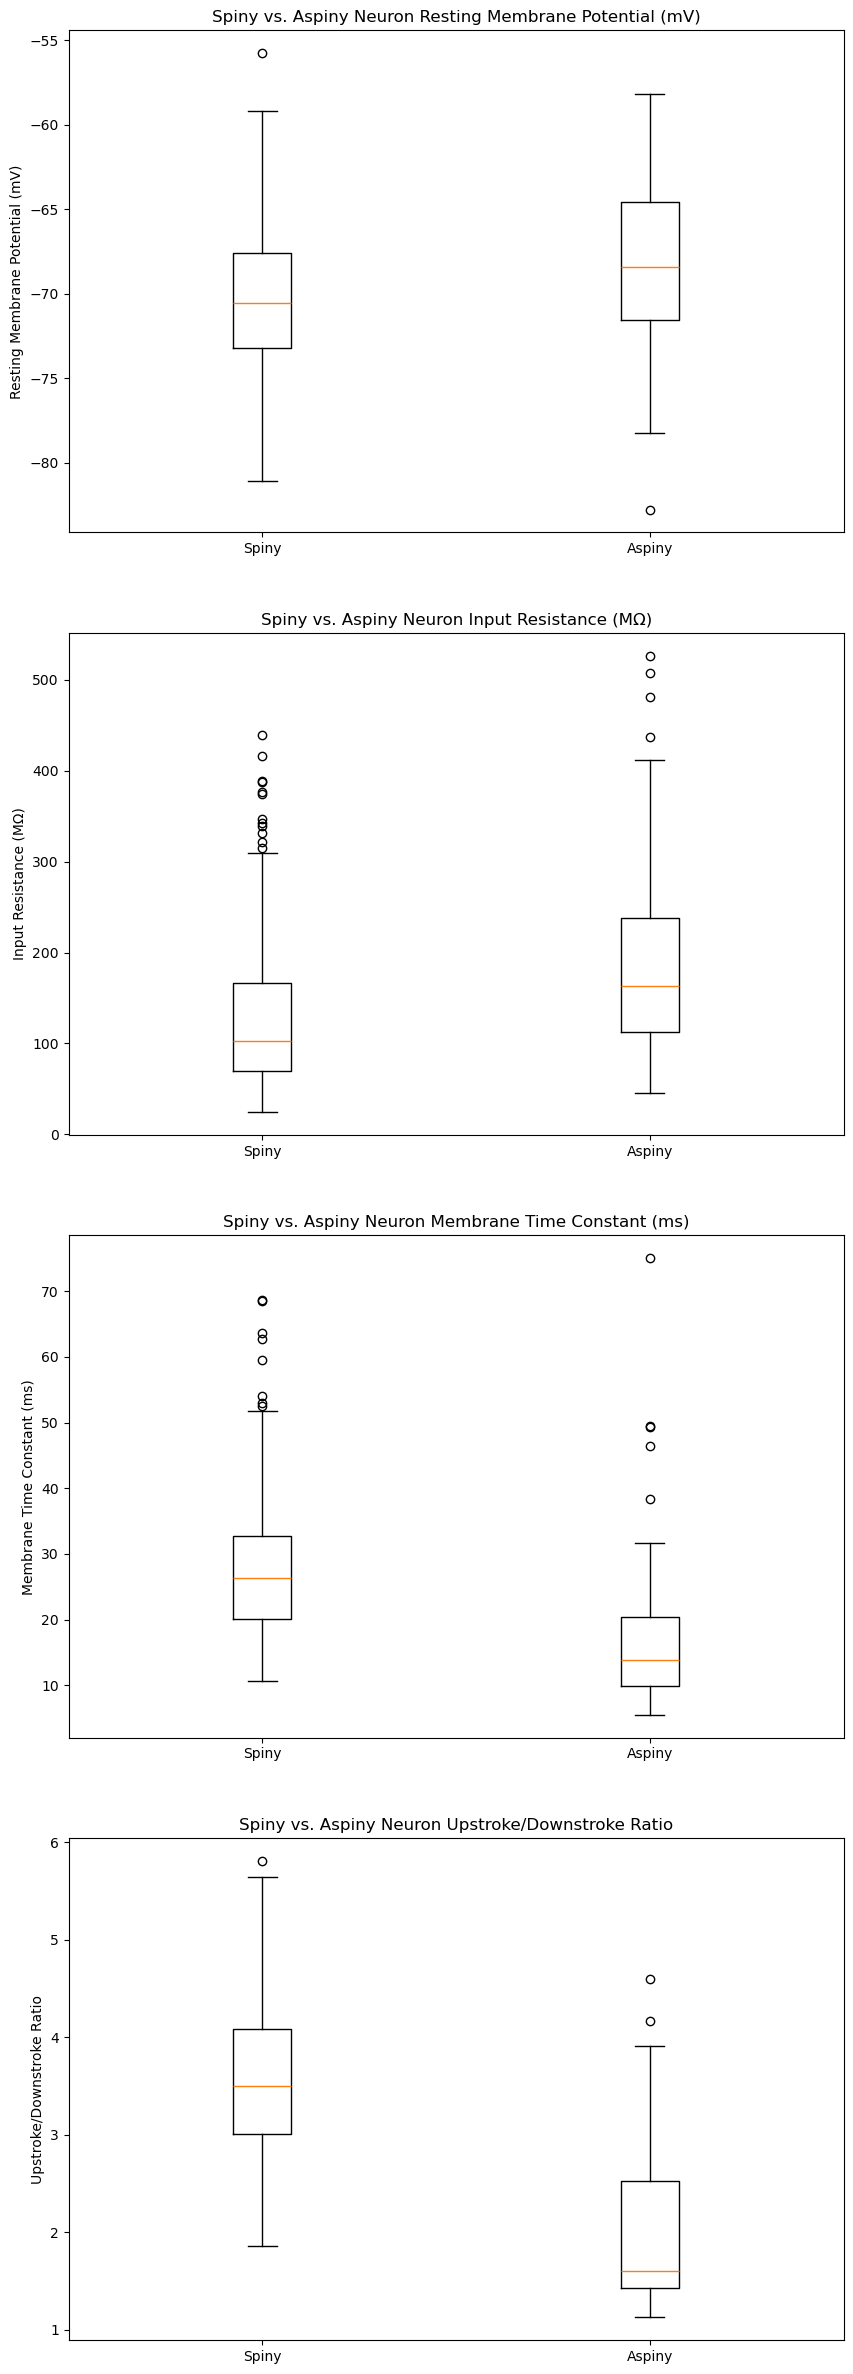

In [71]:
fig, ax = plt.subplots(4, figsize=(10, 30))
plt.title('Spiny vs. Aspiny Electrophysiological Data')

# List of ephys properties of interest that will be plotted
ephys_properties = ['vrest', 'ri', 'tau', 'upstroke_downstroke_ratio_long_square']
ephys_feature_title = ['Resting Membrane Potential (mV)', 'Input Resistance (MΩ)', 'Membrane Time Constant (ms)', 'Upstroke/Downstroke Ratio']

# Index for subplot iteration
index = 0

# Looping through each ephys property to make its own separate subplot in the entire figure
for item in ephys_properties:
    
    # Removing NaN values that might skew the boxplot data distribution
    spiny_ephys = human_spiny_ephys[item].dropna()
    aspiny_ephys = human_aspiny_ephys[item].dropna()
    
  
    ax[index].boxplot([spiny_ephys, aspiny_ephys])
    ax[index].set_xticks([1, 2]) 
    ax[index].set_xticklabels(["Spiny", "Aspiny"])
    ax[index].set_ylabel(ephys_feature_title[index])
    ax[index].set_title(f'Spiny vs. Aspiny Neuron {ephys_feature_title[index]}')
    
    # After the first subplot is made, the loop will move to the next property
    index += 1 

plt.show()


Given these results, it does appear that there is overlap between spiny and aspiny neurons across all ephys properties, with the most visually different property potentially being the upstroke/downstroke ratio. However, we will confirm any statistically signficant differences in the downstream data analysis/results sections to make any solid conclusions. Moving forward to the gene expression, 

## Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [10]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

## Conclusion & Discussion

*Fill in your discussion information here*